# Tuning de Modelos con GridSearchCV y Validación Cruzada

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Cargar dataset
ruta = 'Historia_Climatica.csv'
df = pd.read_csv(ruta)

In [3]:
# Preparación de variables
X_reg = df[['Humedad_%', 'Vel_Viento_mps', 'Presion_hPa']]
y_reg = df['Temperatura_C']
X_clf = X_reg.copy()
y_clf = LabelEncoder().fit_transform(df['Estado_Clima'])

## GridSearchCV - Regresión

In [6]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

modelo_reg = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
modelo_reg.fit(X_train_r, y_train_r)
y_pred_r = modelo_reg.predict(X_test_r)

In [7]:
print("Mejores parámetros (Regresión):", modelo_reg.best_params_)
print("RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_r)))
print("R²:", r2_score(y_test_r, y_pred_r))

Mejores parámetros (Regresión): {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
RMSE: 145.5087516383455
R²: -0.042382892370744996


## GridSearchCV - Clasificación

In [8]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clf, y_clf, stratify=y_clf, test_size=0.2, random_state=42)
modelo_clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
modelo_clf.fit(X_train_c, y_train_c)
y_pred_c = modelo_clf.predict(X_test_c)

In [9]:
print("Mejores parámetros (Clasificación):", modelo_clf.best_params_)
print("Accuracy:", modelo_clf.score(X_test_c, y_test_c))
print(classification_report(y_test_c, y_pred_c))

Mejores parámetros (Clasificación): {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.16831683168316833
              precision    recall  f1-score   support

           0       0.15      0.12      0.13        34
           1       0.19      0.39      0.26        38
           2       0.06      0.06      0.06        34
           3       0.22      0.23      0.23        35
           4       0.23      0.10      0.14        30
           5       0.13      0.06      0.09        31

    accuracy                           0.17       202
   macro avg       0.16      0.16      0.15       202
weighted avg       0.16      0.17      0.15       202



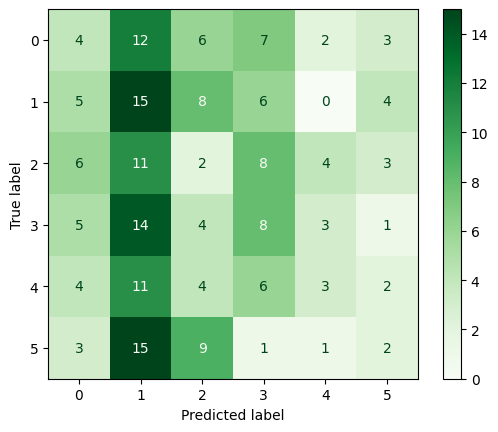

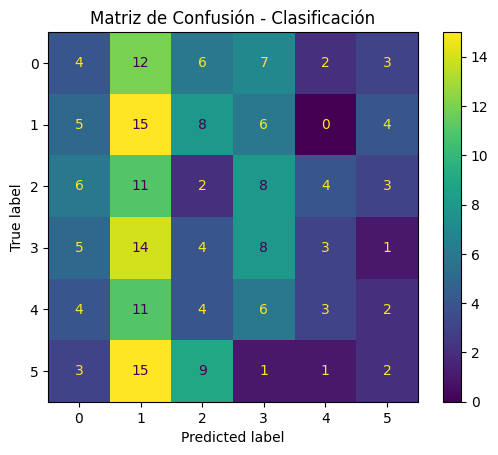

In [10]:
ConfusionMatrixDisplay.from_estimator(modelo_clf, X_test_c, y_test_c, cmap='Greens').plot()
plt.title("Matriz de Confusión - Clasificación")
plt.show()

## Comparación final

In [11]:
print("--- Comparación de Rendimiento ---")
print("R² (Regresión):", r2_score(y_test_r, y_pred_r))
print("Accuracy (Clasificación):", modelo_clf.score(X_test_c, y_test_c))

--- Comparación de Rendimiento ---
R² (Regresión): -0.042382892370744996
Accuracy (Clasificación): 0.16831683168316833
